<a href="https://colab.research.google.com/github/divyani95/Forecast_Production/blob/main/Production__Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [2]:
# Load dataset
file_path = "/Total production till date - 290125.XLSX"
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [3]:
# Drop irrelevant columns
columns_to_drop = [
    "Purchase Order", "Order Price Unit", "Special Stock", "Asset", "WBS Element",
    "Consumption", "Cost Center", "Customer", "Receipt Indicator", "Reason for Movement",
    "Document Header Text", "Reference", "Time of Entry", "Counter", "Currency",
    "Debit/Credit Ind.", "Item", "Item No.Stock Transfer Reserv.", "Material Doc. Year", "Reservation"
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

In [4]:
# Convert Posting Date to datetime
df["Posting Date"] = pd.to_datetime(df["Posting Date"])

In [5]:
# Aggregate production quantity by date
df_daily = df.groupby("Posting Date")["Qty in Un. of Entry"].sum().reset_index()
df_daily = df_daily.sort_values("Posting Date")

In [6]:
# Create a time index
df_daily["Day"] = np.arange(len(df_daily))

In [7]:
# Split data into training and testing
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]
X_train, y_train = train[["Day"]], train["Qty in Un. of Entry"]
X_test, y_test = test[["Day"]], test["Qty in Un. of Entry"]

In [8]:
!pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [11]:

!pip install --upgrade xgboost scikit-learn

# Option 2: Avoid displaying the model directly if not essential

# Instead of relying on automatic display, you could explicitly print specific model information.
# For instance:
print(model.get_booster().get_dump()) # Print the model structure.
print(model.feature_names_in_) # Print feature names.

# Option 3:  downgrade scikit-learn
!pip install scikit-learn==1.3.0

['0:[Day<32] yes=1,no=2,missing=2\n\t1:[Day<24] yes=3,no=4,missing=4\n\t\t3:leaf=-293.649323\n\t\t4:leaf=-109.741943\n\t2:[Day<52] yes=5,no=6,missing=6\n\t\t5:[Day<50] yes=7,no=8,missing=8\n\t\t\t7:leaf=-19.6697083\n\t\t\t8:leaf=-142.889801\n\t\t6:[Day<67] yes=9,no=10,missing=10\n\t\t\t9:leaf=61.6174736\n\t\t\t10:leaf=100.560799\n', '0:[Day<30] yes=1,no=2,missing=2\n\t1:[Day<17] yes=3,no=4,missing=4\n\t\t3:leaf=-292.243652\n\t\t4:[Day<27] yes=7,no=8,missing=8\n\t\t\t7:leaf=-165.160889\n\t\t\t8:leaf=-72.7453766\n\t2:[Day<52] yes=5,no=6,missing=6\n\t\t5:[Day<50] yes=9,no=10,missing=10\n\t\t\t9:leaf=-24.1209545\n\t\t\t10:leaf=-133.363815\n\t\t6:[Day<67] yes=11,no=12,missing=12\n\t\t\t11:leaf=55.840847\n\t\t\t12:leaf=90.6288681\n', '0:[Day<32] yes=1,no=2,missing=2\n\t1:[Day<17] yes=3,no=4,missing=4\n\t\t3:leaf=-264.642883\n\t\t4:[Day<26] yes=7,no=8,missing=8\n\t\t\t7:leaf=-153.826447\n\t\t\t8:leaf=-77.9855881\n\t2:[Day<53] yes=5,no=6,missing=6\n\t\t5:[Day<49] yes=9,no=10,missing=10\n\t\t\t

In [10]:
# Train XGBoost model
model = XGBRegressor(objective="reg:squarederror", n_estimators=50, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
pip install --upgrade xgboost scikit-learn

In [12]:
# Predict next 30 days
future_days = np.arange(len(df_daily), len(df_daily) + 30).reshape(-1, 1)
future_predictions = model.predict(future_days)

In [13]:
# Generate future dates
last_date = df_daily["Posting Date"].max()
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

In [14]:
# Create forecast DataFrame
df_forecast = pd.DataFrame({"Posting Date": future_dates, "Predicted Qty": future_predictions})

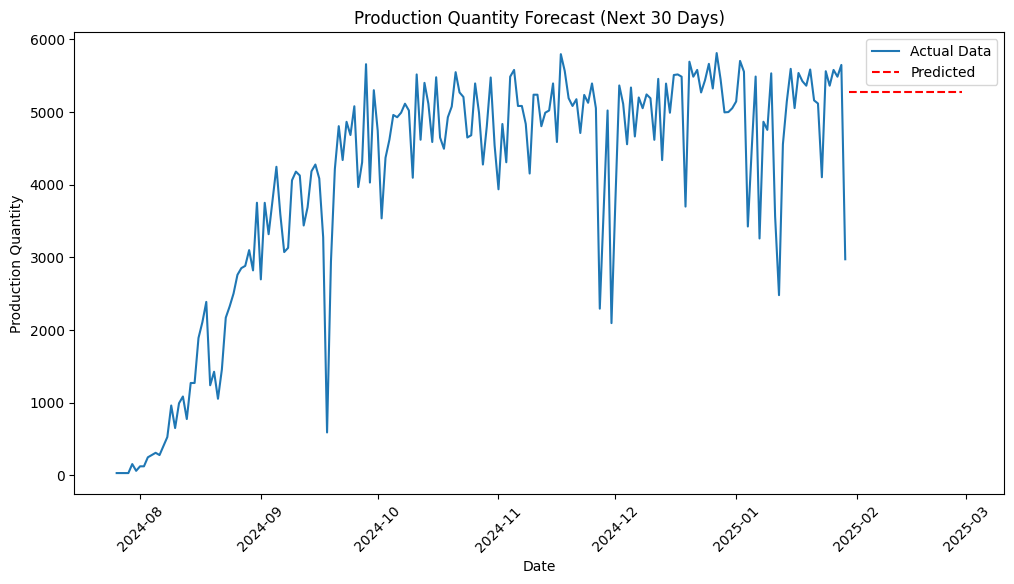

In [15]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Posting Date"], df_daily["Qty in Un. of Entry"], label="Actual Data")
plt.plot(future_dates, future_predictions, label="Predicted", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Production Quantity")
plt.title("Production Quantity Forecast (Next 30 Days)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [17]:
# Save predictions to CSV
df_forecast.to_csv("production_forecast.csv", index=False)
print("Forecast saved as production_forecast.csv")

Forecast saved as production_forecast.csv
